In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GRU, Dense, Dropout, BatchNormalization, concatenate, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Load preprocessed data
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/Thesis/Train_dataset_3.csv', low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Thesis/Test_dataset_3.csv', low_memory=False)

Mounted at /content/drive


In [ ]:
# Initialize metrics storage with 5 runs
n_repeats = 5
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'auc': [],
    'loss': []
}

In [ ]:
# Create synthetic time-series sequences
def create_sequences(data, seq_length=5):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i+seq_length, :-1].values
        label = data.iloc[i+seq_length, -1]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

# Same sequence length as LSTM (5)
SEQ_LENGTH = 5
FEATURES = train.shape[1] - 1

# Create sequences
X_train, y_train = create_sequences(train, SEQ_LENGTH)
X_test, y_test = create_sequences(test, SEQ_LENGTH)

In [ ]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_cnn_gru_model.h5', monitor='val_loss', save_best_only=True)
]


Run 1/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7997 - auc: 0.8765 - loss: 0.6112 - precision: 0.7775 - recall: 0.8334

500/500 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.7998 - auc: 0.8766 - loss: 0.6108 - precision: 0.7776 - recall: 0.8336 - val_accuracy: 0.9390 - val_auc: 0.9854 - val_loss: 0.1710 - val_precision: 0.9211 - val_recall: 0.9603
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9186 - auc: 0.9761 - loss: 0.2696 - precision: 0.8863 - recall: 0.9603 - val_accuracy: 0.9311 - val_auc: 0.9892 - val_loss: 0.1804 - val_precision: 0.8913 - val_recall: 0.9820
Epoch 3/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9321 - auc: 0.9829 - loss: 0.2292 - precision: 0.9081 - recall: 0.9619

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9321 - auc: 0.9829 - loss: 0.2292 - precision: 0.9081 - recall: 0.9619 - val_accuracy: 0.9565 - val_auc: 0.9920 - val_loss: 0.1162 - val_precision: 0.9447 - val_recall: 0.9697
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9403 - auc: 0.9862 - loss: 0.2016 - precision: 0.9191 - recall: 0.9662

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9403 - auc: 0.9862 - loss: 0.2015 - precision: 0.9191 - recall: 0.9662 - val_accuracy: 0.9606 - val_auc: 0.9933 - val_loss: 0.1061 - val_precision: 0.9495 - val_recall: 0.9730
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9447 - auc: 0.9874 - loss: 0.1936 - precision: 0.9255 - recall: 0.9675 - val_accuracy: 0.9439 - val_auc: 0.9933 - val_loss: 0.1409 - val_precision: 0.9111 - val_recall: 0.9837
Epoch 6/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9504 - auc: 0.9899 - loss: 0.1722 - precision: 0.9337 - recall: 0.9704

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9504 - auc: 0.9899 - loss: 0.1722 - precision: 0.9336 - recall: 0.9704 - val_accuracy: 0.9639 - val_auc: 0.9949 - val_loss: 0.0959 - val_precision: 0.9771 - val_recall: 0.9500
Epoch 7/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9544 - auc: 0.9914 - loss: 0.1561 - precision: 0.9393 - recall: 0.9724

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9544 - auc: 0.9914 - loss: 0.1561 - precision: 0.9393 - recall: 0.9724 - val_accuracy: 0.9694 - val_auc: 0.9960 - val_loss: 0.0799 - val_precision: 0.9697 - val_recall: 0.9690
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9570 - auc: 0.9922 - loss: 0.1498 - precision: 0.9397 - recall: 0.9761 - val_accuracy: 0.9581 - val_auc: 0.9957 - val_loss: 0.1074 - val_precision: 0.9321 - val_recall: 0.9883
Epoch 9/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9565 - auc: 0.9926 - loss: 0.1464 - precision: 0.9397 - recall: 0.9750

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9566 - auc: 0.9926 - loss: 0.1464 - precision: 0.9397 - recall: 0.9750 - val_accuracy: 0.9709 - val_auc: 0.9967 - val_loss: 0.0746 - val_precision: 0.9615 - val_recall: 0.9810
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9577 - auc: 0.9929 - loss: 0.1410 - precision: 0.9404 - recall: 0.9766 - val_accuracy: 0.9696 - val_auc: 0.9968 - val_loss: 0.0780 - val_precision: 0.9550 - val_recall: 0.9858
Epoch 11/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9627 - auc: 0.9941 - loss: 0.1285 - precision: 0.9471 - recall: 0.9806

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9627 - auc: 0.9941 - loss: 0.1285 - precision: 0.9471 - recall: 0.9806 - val_accuracy: 0.9775 - val_auc: 0.9972 - val_loss: 0.0631 - val_precision: 0.9768 - val_recall: 0.9783
Epoch 12/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9676 - auc: 0.9948 - loss: 0.1197 - precision: 0.9561 - recall: 0.9806

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9676 - auc: 0.9948 - loss: 0.1197 - precision: 0.9561 - recall: 0.9806 - val_accuracy: 0.9790 - val_auc: 0.9973 - val_loss: 0.0628 - val_precision: 0.9826 - val_recall: 0.9753
Epoch 13/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9678 - auc: 0.9947 - loss: 0.1228 - precision: 0.9550 - recall: 0.9819

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9678 - auc: 0.9947 - loss: 0.1228 - precision: 0.9550 - recall: 0.9819 - val_accuracy: 0.9802 - val_auc: 0.9976 - val_loss: 0.0601 - val_precision: 0.9849 - val_recall: 0.9755
Epoch 14/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9653 - auc: 0.9941 - loss: 0.1235 - precision: 0.9519 - recall: 0.9801

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9653 - auc: 0.9941 - loss: 0.1235 - precision: 0.9519 - recall: 0.9801 - val_accuracy: 0.9806 - val_auc: 0.9978 - val_loss: 0.0564 - val_precision: 0.9784 - val_recall: 0.9830
Epoch 15/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9687 - auc: 0.9949 - loss: 0.1135 - precision: 0.9571 - recall: 0.9818 - val_accuracy: 0.9800 - val_auc: 0.9977 - val_loss: 0.0581 - val_precision: 0.9720 - val_recall: 0.9885
Epoch 16/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9693 - auc: 0.9952 - loss: 0.1165 - precision: 0.9585 - recall: 0.9810

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9693 - auc: 0.9952 - loss: 0.1165 - precision: 0.9585 - recall: 0.9810 - val_accuracy: 0.9819 - val_auc: 0.9978 - val_loss: 0.0542 - val_precision: 0.9775 - val_recall: 0.9865
Epoch 17/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9703 - auc: 0.9963 - loss: 0.1029 - precision: 0.9578 - recall: 0.9841

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9703 - auc: 0.9963 - loss: 0.1029 - precision: 0.9578 - recall: 0.9841 - val_accuracy: 0.9836 - val_auc: 0.9981 - val_loss: 0.0509 - val_precision: 0.9842 - val_recall: 0.9830
Epoch 18/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9719 - auc: 0.9958 - loss: 0.0995 - precision: 0.9610 - recall: 0.9836

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9719 - auc: 0.9958 - loss: 0.0995 - precision: 0.9610 - recall: 0.9836 - val_accuracy: 0.9841 - val_auc: 0.9984 - val_loss: 0.0485 - val_precision: 0.9867 - val_recall: 0.9815
Epoch 19/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9722 - auc: 0.9954 - loss: 0.1059 - precision: 0.9613 - recall: 0.9842

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9722 - auc: 0.9954 - loss: 0.1059 - precision: 0.9613 - recall: 0.9842 - val_accuracy: 0.9840 - val_auc: 0.9983 - val_loss: 0.0469 - val_precision: 0.9842 - val_recall: 0.9837
Epoch 20/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9746 - auc: 0.9968 - loss: 0.0922 - precision: 0.9646 - recall: 0.9854 - val_accuracy: 0.9730 - val_auc: 0.9979 - val_loss: 0.0699 - val_precision: 0.9537 - val_recall: 0.9942
Epoch 21/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9751 - auc: 0.9965 - loss: 0.0938 - precision: 0.9648 - recall: 0.9860 - val_accuracy: 0.9821 - val_auc: 0.9980 - val_loss: 0.0493 - val_precision: 0.9852 - val_recall: 0.9790
Epoch 22/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9750 - auc: 0.9967 - loss: 0.0911 - precision: 0.9645 - recall: 0.9868

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9750 - auc: 0.9967 - loss: 0.0911 - precision: 0.9645 - recall: 0.9868 - val_accuracy: 0.9852 - val_auc: 0.9983 - val_loss: 0.0462 - val_precision: 0.9865 - val_recall: 0.9840
Epoch 23/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9754 - auc: 0.9966 - loss: 0.0933 - precision: 0.9668 - recall: 0.9849

500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9754 - auc: 0.9966 - loss: 0.0933 - precision: 0.9668 - recall: 0.9849 - val_accuracy: 0.9850 - val_auc: 0.9986 - val_loss: 0.0448 - val_precision: 0.9790 - val_recall: 0.9912
Epoch 24/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9777 - auc: 0.9970 - loss: 0.0839 - precision: 0.9686 - recall: 0.9875

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9777 - auc: 0.9970 - loss: 0.0839 - precision: 0.9686 - recall: 0.9875 - val_accuracy: 0.9857 - val_auc: 0.9985 - val_loss: 0.0423 - val_precision: 0.9826 - val_recall: 0.9890
Epoch 25/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9750 - auc: 0.9973 - loss: 0.0853 - precision: 0.9644 - recall: 0.9864 - val_accuracy: 0.9856 - val_auc: 0.9984 - val_loss: 0.0425 - val_precision: 0.9824 - val_recall: 0.9890
Epoch 26/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9787 - auc: 0.9975 - loss: 0.0769 - precision: 0.9699 - recall: 0.9881 - val_accuracy: 0.9842 - val_auc: 0.9987 - val_loss: 0.0443 - val_precision: 0.9901 - val_recall: 0.9783
Epoch 27/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9777 - auc: 0.9972 - loss: 0.0806 - precision: 0.9683 - recall: 0.9869 - val_accuracy: 0.9850 - val_auc: 0.9987 - val_loss: 0.0439 - val_precision: 0.9778 - val_recall: 0.9925
Epoch 28/100
498/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9760 - auc: 0.9969 - loss: 0.0835 - precision: 0.9636 - recall: 0.9886 - val_accuracy: 0.9872 - val_auc: 0.9988 - val_loss: 0.0386 - val_precision: 0.9863 - val_recall: 0.9883
Epoch 29/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9798 - auc: 0.9974 - loss: 0.0759 - precision: 0.9710 - recall: 0.9892 - val_accuracy: 0.9837 - val_auc: 0.9987 - val_loss: 0.0481 - val_precision: 0.9929 - val_recall: 0.9745
Epoch 30/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9790 - auc: 0.9975 - loss: 0.0764 - precision: 0.9701 - recall: 0.9885 - val_accuracy: 0.9857 - val_auc: 0.9988 - val_loss: 0.0401 - val_precision: 0.9800 - val_recall: 0.9918
Epoch 31/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9795 - auc: 0.9980 - loss: 0.0725 - precision: 0.9711 - recall: 0.9887

500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9795 - auc: 0.9980 - loss: 0.0725 - precision: 0.9711 - recall: 0.9887 - val_accuracy: 0.9869 - val_auc: 0.9987 - val_loss: 0.0384 - val_precision: 0.9885 - val_recall: 0.9852
Epoch 32/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9815 - auc: 0.9979 - loss: 0.0699 - precision: 0.9738 - recall: 0.9897 - val_accuracy: 0.9855 - val_auc: 0.9987 - val_loss: 0.0438 - val_precision: 0.9924 - val_recall: 0.9785
Epoch 33/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9801 - auc: 0.9977 - loss: 0.0722 - precision: 0.9730 - recall: 0.9872

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9801 - auc: 0.9977 - loss: 0.0722 - precision: 0.9731 - recall: 0.9872 - val_accuracy: 0.9871 - val_auc: 0.9989 - val_loss: 0.0369 - val_precision: 0.9827 - val_recall: 0.9918
Epoch 34/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9822 - auc: 0.9979 - loss: 0.0653 - precision: 0.9747 - recall: 0.9903 - val_accuracy: 0.9866 - val_auc: 0.9988 - val_loss: 0.0384 - val_precision: 0.9819 - val_recall: 0.9915
Epoch 35/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9836 - auc: 0.9978 - loss: 0.0649 - precision: 0.9772 - recall: 0.9904 - val_accuracy: 0.9874 - val_auc: 0.9986 - val_loss: 0.0372 - val_precision: 0.9829 - val_recall: 0.9920
Epoch 36/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9836 - auc: 0.9985 - loss: 0.0621 - precision: 0.9772 - recall: 0.9907

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9836 - auc: 0.9985 - loss: 0.0621 - precision: 0.9772 - recall: 0.9907 - val_accuracy: 0.9872 - val_auc: 0.9989 - val_loss: 0.0356 - val_precision: 0.9892 - val_recall: 0.9852
Epoch 37/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9834 - auc: 0.9980 - loss: 0.0619 - precision: 0.9762 - recall: 0.9908

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9834 - auc: 0.9980 - loss: 0.0619 - precision: 0.9762 - recall: 0.9908 - val_accuracy: 0.9884 - val_auc: 0.9988 - val_loss: 0.0340 - val_precision: 0.9878 - val_recall: 0.9890
Epoch 38/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9835 - auc: 0.9980 - loss: 0.0620 - precision: 0.9770 - recall: 0.9906 - val_accuracy: 0.9874 - val_auc: 0.9987 - val_loss: 0.0367 - val_precision: 0.9841 - val_recall: 0.9908
Epoch 39/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9860 - auc: 0.9984 - loss: 0.0549 - precision: 0.9805 - recall: 0.9918

500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9860 - auc: 0.9984 - loss: 0.0550 - precision: 0.9805 - recall: 0.9918 - val_accuracy: 0.9889 - val_auc: 0.9992 - val_loss: 0.0327 - val_precision: 0.9897 - val_recall: 0.9880
Epoch 40/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9865 - auc: 0.9987 - loss: 0.0506 - precision: 0.9804 - recall: 0.9927 - val_accuracy: 0.9872 - val_auc: 0.9992 - val_loss: 0.0352 - val_precision: 0.9927 - val_recall: 0.9818
Epoch 41/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9846 - auc: 0.9987 - loss: 0.0546 - precision: 0.9769 - recall: 0.9926 - val_accuracy: 0.9889 - val_auc: 0.9991 - val_loss: 0.0329 - val_precision: 0.9870 - val_recall: 0.9908
Epoch 42/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9840 - auc: 0.9985 - loss: 0.0558 - precision: 0.9767 - recall: 0.9912

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9841 - auc: 0.9985 - loss: 0.0557 - precision: 0.9767 - recall: 0.9912 - val_accuracy: 0.9880 - val_auc: 0.9990 - val_loss: 0.0325 - val_precision: 0.9868 - val_recall: 0.9893
Epoch 43/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9856 - auc: 0.9986 - loss: 0.0528 - precision: 0.9786 - recall: 0.9928 - val_accuracy: 0.9859 - val_auc: 0.9986 - val_loss: 0.0398 - val_precision: 0.9772 - val_recall: 0.9950
Epoch 44/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9863 - auc: 0.9988 - loss: 0.0487 - precision: 0.9791 - recall: 0.9936

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9863 - auc: 0.9988 - loss: 0.0487 - precision: 0.9791 - recall: 0.9936 - val_accuracy: 0.9887 - val_auc: 0.9992 - val_loss: 0.0315 - val_precision: 0.9887 - val_recall: 0.9887
Epoch 45/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9878 - auc: 0.9992 - loss: 0.0441 - precision: 0.9821 - recall: 0.9938

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9878 - auc: 0.9992 - loss: 0.0441 - precision: 0.9821 - recall: 0.9938 - val_accuracy: 0.9889 - val_auc: 0.9990 - val_loss: 0.0309 - val_precision: 0.9902 - val_recall: 0.9875
Epoch 46/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9854 - auc: 0.9986 - loss: 0.0552 - precision: 0.9799 - recall: 0.9910 - val_accuracy: 0.9872 - val_auc: 0.9991 - val_loss: 0.0340 - val_precision: 0.9919 - val_recall: 0.9825
Epoch 47/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9858 - auc: 0.9991 - loss: 0.0482 - precision: 0.9809 - recall: 0.9910 - val_accuracy: 0.9890 - val_auc: 0.9989 - val_loss: 0.0318 - val_precision: 0.9888 - val_recall: 0.9893
Epoch 48/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9878 - auc: 0.9989 - loss: 0.0493 - precision: 0.9818 - recall: 0.9940

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9878 - auc: 0.9989 - loss: 0.0493 - precision: 0.9818 - recall: 0.9940 - val_accuracy: 0.9896 - val_auc: 0.9993 - val_loss: 0.0308 - val_precision: 0.9880 - val_recall: 0.9912
Epoch 49/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9876 - auc: 0.9988 - loss: 0.0482 - precision: 0.9822 - recall: 0.9934 - val_accuracy: 0.9875 - val_auc: 0.9988 - val_loss: 0.0352 - val_precision: 0.9815 - val_recall: 0.9937
Epoch 50/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9869 - auc: 0.9987 - loss: 0.0480 - precision: 0.9811 - recall: 0.9930

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9869 - auc: 0.9987 - loss: 0.0480 - precision: 0.9811 - recall: 0.9930 - val_accuracy: 0.9896 - val_auc: 0.9992 - val_loss: 0.0298 - val_precision: 0.9915 - val_recall: 0.9877
Epoch 51/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9880 - auc: 0.9990 - loss: 0.0455 - precision: 0.9825 - recall: 0.9938 - val_accuracy: 0.9866 - val_auc: 0.9985 - val_loss: 0.0375 - val_precision: 0.9781 - val_recall: 0.9955
Epoch 52/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9888 - auc: 0.9994 - loss: 0.0388 - precision: 0.9834 - recall: 0.9944 - val_accuracy: 0.9882 - val_auc: 0.9990 - val_loss: 0.0332 - val_precision: 0.9827 - val_recall: 0.9940
Epoch 53/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9885 - auc: 0.9989 - loss: 0.0452 - precision: 0.9829 - recall: 0.9944

500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9885 - auc: 0.9989 - loss: 0.0452 - precision: 0.9829 - recall: 0.9944 - val_accuracy: 0.9890 - val_auc: 0.9993 - val_loss: 0.0296 - val_precision: 0.9924 - val_recall: 0.9855
Epoch 54/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9880 - auc: 0.9990 - loss: 0.0443 - precision: 0.9829 - recall: 0.9933 - val_accuracy: 0.9799 - val_auc: 0.9990 - val_loss: 0.0523 - val_precision: 0.9959 - val_recall: 0.9638
Epoch 55/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9882 - auc: 0.9992 - loss: 0.0427 - precision: 0.9839 - recall: 0.9925

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9882 - auc: 0.9992 - loss: 0.0427 - precision: 0.9839 - recall: 0.9925 - val_accuracy: 0.9902 - val_auc: 0.9991 - val_loss: 0.0282 - val_precision: 0.9912 - val_recall: 0.9893
Epoch 56/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9890 - auc: 0.9992 - loss: 0.0418 - precision: 0.9844 - recall: 0.9936 - val_accuracy: 0.9899 - val_auc: 0.9991 - val_loss: 0.0287 - val_precision: 0.9871 - val_recall: 0.9927
Epoch 57/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9888 - auc: 0.9993 - loss: 0.0379 - precision: 0.9836 - recall: 0.9942

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9888 - auc: 0.9993 - loss: 0.0379 - precision: 0.9836 - recall: 0.9942 - val_accuracy: 0.9902 - val_auc: 0.9989 - val_loss: 0.0280 - val_precision: 0.9871 - val_recall: 0.9935
Epoch 58/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9887 - auc: 0.9988 - loss: 0.0396 - precision: 0.9828 - recall: 0.9949 - val_accuracy: 0.9875 - val_auc: 0.9986 - val_loss: 0.0358 - val_precision: 0.9796 - val_recall: 0.9958
Epoch 59/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9867 - auc: 0.9987 - loss: 0.0480 - precision: 0.9812 - recall: 0.9925

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9867 - auc: 0.9987 - loss: 0.0480 - precision: 0.9813 - recall: 0.9925 - val_accuracy: 0.9900 - val_auc: 0.9992 - val_loss: 0.0273 - val_precision: 0.9930 - val_recall: 0.9870
Epoch 60/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9907 - auc: 0.9994 - loss: 0.0334 - precision: 0.9862 - recall: 0.9953 - val_accuracy: 0.9904 - val_auc: 0.9992 - val_loss: 0.0284 - val_precision: 0.9859 - val_recall: 0.9950
Epoch 61/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9909 - auc: 0.9993 - loss: 0.0354 - precision: 0.9866 - recall: 0.9954

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9909 - auc: 0.9993 - loss: 0.0354 - precision: 0.9866 - recall: 0.9954 - val_accuracy: 0.9901 - val_auc: 0.9992 - val_loss: 0.0266 - val_precision: 0.9910 - val_recall: 0.9893
Epoch 62/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9893 - auc: 0.9991 - loss: 0.0396 - precision: 0.9852 - recall: 0.9935 - val_accuracy: 0.9901 - val_auc: 0.9990 - val_loss: 0.0277 - val_precision: 0.9920 - val_recall: 0.9883
Epoch 63/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9902 - auc: 0.9992 - loss: 0.0384 - precision: 0.9860 - recall: 0.9946

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9902 - auc: 0.9992 - loss: 0.0384 - precision: 0.9860 - recall: 0.9946 - val_accuracy: 0.9912 - val_auc: 0.9993 - val_loss: 0.0263 - val_precision: 0.9886 - val_recall: 0.9940
Epoch 64/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9907 - auc: 0.9992 - loss: 0.0362 - precision: 0.9866 - recall: 0.9951 - val_accuracy: 0.9851 - val_auc: 0.9993 - val_loss: 0.0385 - val_precision: 0.9949 - val_recall: 0.9753
Epoch 65/100
497/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9891 - auc: 0.9992 - loss: 0.0375 - precision: 0.9845 - recall: 0.9939

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9891 - auc: 0.9992 - loss: 0.0375 - precision: 0.9845 - recall: 0.9938 - val_accuracy: 0.9900 - val_auc: 0.9995 - val_loss: 0.0251 - val_precision: 0.9910 - val_recall: 0.9890
Epoch 66/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9894 - auc: 0.9994 - loss: 0.0372 - precision: 0.9852 - recall: 0.9936 - val_accuracy: 0.9904 - val_auc: 0.9993 - val_loss: 0.0278 - val_precision: 0.9925 - val_recall: 0.9883
Epoch 67/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9902 - auc: 0.9992 - loss: 0.0365 - precision: 0.9860 - recall: 0.9946 - val_accuracy: 0.9857 - val_auc: 0.9992 - val_loss: 0.0389 - val_precision: 0.9949 - val_recall: 0.9765
Epoch 68/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9906 - auc: 0.9995 - loss: 0.0351 - precision: 0.9868 - recall: 0.9946

500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9906 - auc: 0.9995 - loss: 0.0351 - precision: 0.9868 - recall: 0.9946 - val_accuracy: 0.9912 - val_auc: 0.9994 - val_loss: 0.0242 - val_precision: 0.9912 - val_recall: 0.9912
Epoch 69/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9903 - auc: 0.9990 - loss: 0.0356 - precision: 0.9852 - recall: 0.9955 - val_accuracy: 0.9905 - val_auc: 0.9988 - val_loss: 0.0255 - val_precision: 0.9903 - val_recall: 0.9908
Epoch 70/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9909 - auc: 0.9994 - loss: 0.0330 - precision: 0.9874 - recall: 0.9947 - val_accuracy: 0.9911 - val_auc: 0.9995 - val_loss: 0.0242 - val_precision: 0.9908 - val_recall: 0.9915
Epoch 71/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9916 - auc: 0.9995 - loss: 0.0309 - precision: 0.9880 - recall: 0.9952 - val_accuracy: 0.9889 - val_auc: 0.9991 - val_loss: 0.0276 - val_precision: 0.9929 - val_recall: 0.9847
Epoch 72/100
500/500 ━━━━━━━━━━━━

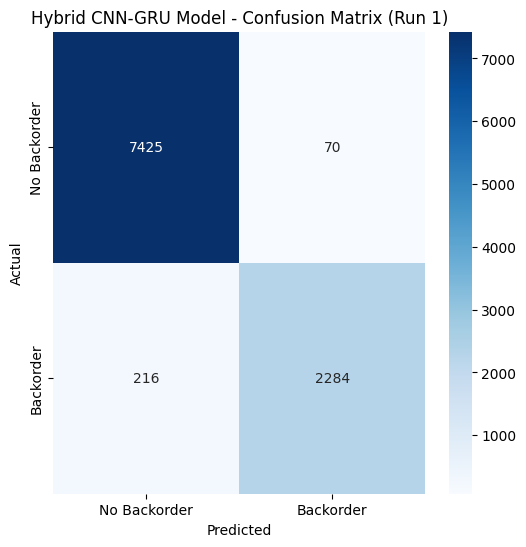


Run 2/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.8044 - auc: 0.8814 - loss: 0.6048 - precision: 0.7892 - recall: 0.8229 - val_accuracy: 0.9406 - val_auc: 0.9857 - val_loss: 0.1638 - val_precision: 0.9377 - val_recall: 0.9440
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9225 - auc: 0.9775 - loss: 0.2633 - precision: 0.8941 - recall: 0.9579 - val_accuracy: 0.9530 - val_auc: 0.9896 - val_loss: 0.1296 - val_precision: 0.9594 - val_recall: 0.9460
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9341 - auc: 0.9831 - loss: 0.2259 - precision: 0.9097 - recall: 0.9645 - val_accuracy: 0.9539 - val_auc: 0.9915 - val_loss: 0.1212 - val_precision: 0.9399 - val_recall: 0.9697
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9399 - auc: 0.9844 - loss: 0.2137 - precision: 0.9182 - recall: 0.9653 - val_accuracy: 0.9576 - val_auc: 0.9932 - val_loss: 0.1115 - val_precision: 0.9444 - val_recall: 0.9725
Epoch 5/100
5

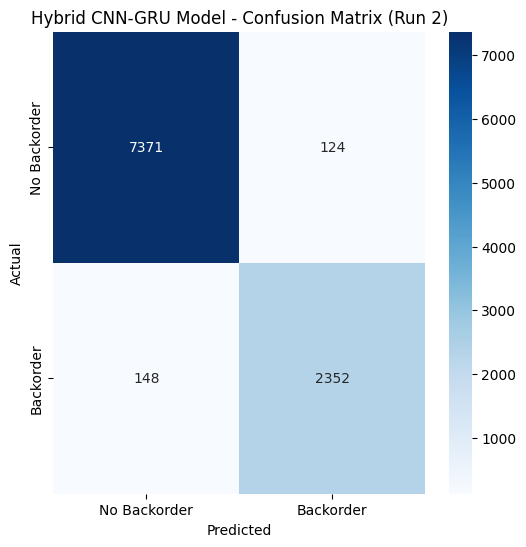


Run 3/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8123 - auc: 0.8875 - loss: 0.5848 - precision: 0.7905 - recall: 0.8486 - val_accuracy: 0.9390 - val_auc: 0.9859 - val_loss: 0.1676 - val_precision: 0.9244 - val_recall: 0.9563
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9214 - auc: 0.9776 - loss: 0.2597 - precision: 0.8934 - recall: 0.9588 - val_accuracy: 0.9520 - val_auc: 0.9901 - val_loss: 0.1265 - val_precision: 0.9475 - val_recall: 0.9570
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9338 - auc: 0.9831 - loss: 0.2271 - precision: 0.9126 - recall: 0.9593 - val_accuracy: 0.9484 - val_auc: 0.9917 - val_loss: 0.1283 - val_precision: 0.9296 - val_recall: 0.9703
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9401 - auc: 0.9863 - loss: 0.2031 - precision: 0.9191 - recall: 0.9653 - val_accuracy: 0.9535 - val_auc: 0.9933 - val_loss: 0.1200 - val_precision: 0.9327 - val_recall: 0.9775
Epoch 5/100
5

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9896 - auc: 0.9989 - loss: 0.0401 - precision: 0.9855 - recall: 0.9939 - val_accuracy: 0.9911 - val_auc: 0.9994 - val_loss: 0.0241 - val_precision: 0.9893 - val_recall: 0.9930
Epoch 64/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9907 - auc: 0.9994 - loss: 0.0347 - precision: 0.9871 - recall: 0.9946 - val_accuracy: 0.9901 - val_auc: 0.9989 - val_loss: 0.0279 - val_precision: 0.9844 - val_recall: 0.9960
Epoch 65/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9917 - auc: 0.9993 - loss: 0.0323 - precision: 0.9876 - recall: 0.9960 - val_accuracy: 0.9906 - val_auc: 0.9995 - val_loss: 0.0256 - val_precision: 0.9922 - val_recall: 0.9890
Epoch 66/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9891 - auc: 0.9990 - loss: 0.0418 - precision: 0.9853 - recall: 0.9931

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9891 - auc: 0.9990 - loss: 0.0418 - precision: 0.9853 - recall: 0.9931 - val_accuracy: 0.9909 - val_auc: 0.9994 - val_loss: 0.0239 - val_precision: 0.9908 - val_recall: 0.9910
Epoch 67/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9902 - auc: 0.9994 - loss: 0.0361 - precision: 0.9858 - recall: 0.9947 - val_accuracy: 0.9887 - val_auc: 0.9996 - val_loss: 0.0278 - val_precision: 0.9937 - val_recall: 0.9837
Epoch 68/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9904 - auc: 0.9994 - loss: 0.0338 - precision: 0.9856 - recall: 0.9953 - val_accuracy: 0.9910 - val_auc: 0.9991 - val_loss: 0.0262 - val_precision: 0.9903 - val_recall: 0.9918
Epoch 69/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9898 - auc: 0.9987 - loss: 0.0389 - precision: 0.9843 - recall: 0.9951 - val_accuracy: 0.9911 - val_auc: 0.9992 - val_loss: 0.0248 - val_precision: 0.9883 - val_recall: 0.9940
Epoch 70/100
500/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9908 - auc: 0.9992 - loss: 0.0353 - precision: 0.9861 - recall: 0.9954 - val_accuracy: 0.9911 - val_auc: 0.9993 - val_loss: 0.0232 - val_precision: 0.9900 - val_recall: 0.9923
Epoch 71/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9906 - auc: 0.9993 - loss: 0.0342 - precision: 0.9864 - recall: 0.9950 - val_accuracy: 0.9912 - val_auc: 0.9990 - val_loss: 0.0254 - val_precision: 0.9871 - val_recall: 0.9955
Epoch 72/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9926 - auc: 0.9994 - loss: 0.0296 - precision: 0.9895 - recall: 0.9959 - val_accuracy: 0.9899 - val_auc: 0.9991 - val_loss: 0.0288 - val_precision: 0.9835 - val_recall: 0.9965
Epoch 73/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9906 - auc: 0.9994 - loss: 0.0332 - precision: 0.9872 - recall: 0.9940 - val_accuracy: 0.9891 - val_auc: 0.9989 - val_loss: 0.0315 - val_precision: 0.9808 - val_recall: 0.9977
Epoch 74/100
500/500 ━━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9912 - auc: 0.9995 - loss: 0.0320 - precision: 0.9873 - recall: 0.9952 - val_accuracy: 0.9921 - val_auc: 0.9993 - val_loss: 0.0229 - val_precision: 0.9900 - val_recall: 0.9942
Epoch 76/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9916 - auc: 0.9995 - loss: 0.0291 - precision: 0.9884 - recall: 0.9949 - val_accuracy: 0.9916 - val_auc: 0.9993 - val_loss: 0.0235 - val_precision: 0.9925 - val_recall: 0.9908
Epoch 77/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9923 - auc: 0.9995 - loss: 0.0295 - precision: 0.9887 - recall: 0.9958 - val_accuracy: 0.9891 - val_auc: 0.9988 - val_loss: 0.0308 - val_precision: 0.9815 - val_recall: 0.9970
Epoch 78/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9914 - auc: 0.9993 - loss: 0.0334 - precision: 0.9876 - recall: 0.9954 - val_accuracy: 0.9871 - val_auc: 0.9984 - val_loss: 0.0419 - val_precision: 0.9763 - val_recall: 0.9985
Epoch 79/100
500/500 ━━━━━━━━━

500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9935 - auc: 0.9996 - loss: 0.0248 - precision: 0.9906 - recall: 0.9965 - val_accuracy: 0.9919 - val_auc: 0.9991 - val_loss: 0.0214 - val_precision: 0.9915 - val_recall: 0.9923
Epoch 84/100
499/500 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9921 - auc: 0.9997 - loss: 0.0252 - precision: 0.9886 - recall: 0.9957

500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9921 - auc: 0.9997 - loss: 0.0252 - precision: 0.9886 - recall: 0.9957 - val_accuracy: 0.9919 - val_auc: 0.9993 - val_loss: 0.0213 - val_precision: 0.9910 - val_recall: 0.9927
Epoch 85/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9920 - auc: 0.9996 - loss: 0.0279 - precision: 0.9881 - recall: 0.9958 - val_accuracy: 0.9890 - val_auc: 0.9988 - val_loss: 0.0327 - val_precision: 0.9808 - val_recall: 0.9975
Epoch 86/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9912 - auc: 0.9995 - loss: 0.0305 - precision: 0.9869 - recall: 0.9956

500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9912 - auc: 0.9995 - loss: 0.0305 - precision: 0.9869 - recall: 0.9956 - val_accuracy: 0.9927 - val_auc: 0.9994 - val_loss: 0.0212 - val_precision: 0.9915 - val_recall: 0.9940
Epoch 87/100
498/500 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9924 - auc: 0.9995 - loss: 0.0281 - precision: 0.9889 - recall: 0.9961

500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9924 - auc: 0.9995 - loss: 0.0281 - precision: 0.9889 - recall: 0.9961 - val_accuracy: 0.9930 - val_auc: 0.9995 - val_loss: 0.0203 - val_precision: 0.9910 - val_recall: 0.9950
Epoch 88/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9924 - auc: 0.9993 - loss: 0.0289 - precision: 0.9889 - recall: 0.9958 - val_accuracy: 0.9912 - val_auc: 0.9992 - val_loss: 0.0251 - val_precision: 0.9861 - val_recall: 0.9965
Epoch 89/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9932 - auc: 0.9998 - loss: 0.0238 - precision: 0.9900 - recall: 0.9964 - val_accuracy: 0.9916 - val_auc: 0.9991 - val_loss: 0.0227 - val_precision: 0.9900 - val_recall: 0.9933
Epoch 90/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9925 - auc: 0.9993 - loss: 0.0269 - precision: 0.9895 - recall: 0.9957 - val_accuracy: 0.9907 - val_auc: 0.9987 - val_loss: 0.0287 - val_precision: 0.9840 - val_recall: 0.9977
Epoch 91/100
500/500 ━━━━━━━━━━

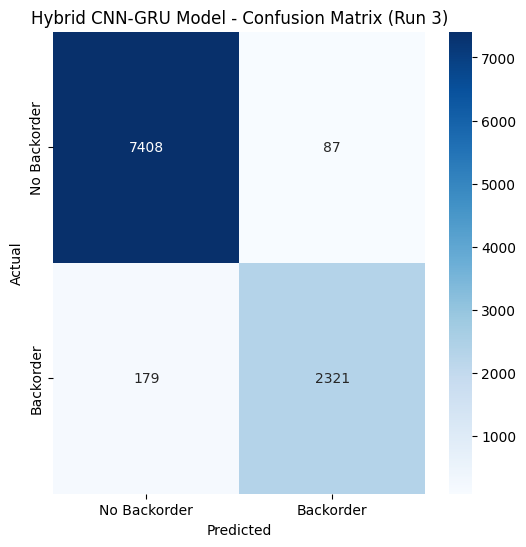


Run 4/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.8260 - auc: 0.9029 - loss: 0.5401 - precision: 0.8072 - recall: 0.8578 - val_accuracy: 0.9295 - val_auc: 0.9859 - val_loss: 0.1776 - val_precision: 0.8944 - val_recall: 0.9740
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9192 - auc: 0.9785 - loss: 0.2550 - precision: 0.8886 - recall: 0.9596 - val_accuracy: 0.9452 - val_auc: 0.9899 - val_loss: 0.1410 - val_precision: 0.9214 - val_recall: 0.9735
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9352 - auc: 0.9844 - loss: 0.2183 - precision: 0.9125 - recall: 0.9622 - val_accuracy: 0.9497 - val_auc: 0.9915 - val_loss: 0.1243 - val_precision: 0.9350 - val_recall: 0.9668
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9398 - auc: 0.9860 - loss: 0.2050 - precision: 0.9192 - recall: 0.9654 - val_accuracy: 0.9552 - val_auc: 0.9935 - val_loss: 0.1135 - val_precision: 0.9380 - val_recall: 0.9750
Epoch 5/100

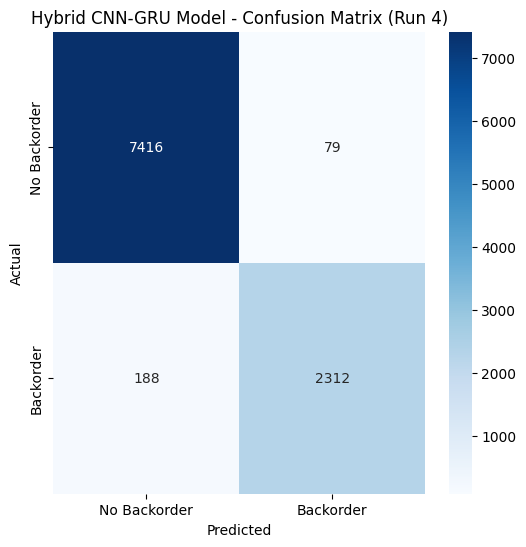


Run 5/5
Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8246 - auc: 0.9013 - loss: 0.5491 - precision: 0.8086 - recall: 0.8471 - val_accuracy: 0.9425 - val_auc: 0.9866 - val_loss: 0.1749 - val_precision: 0.9588 - val_recall: 0.9247
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9211 - auc: 0.9767 - loss: 0.2652 - precision: 0.8923 - recall: 0.9570 - val_accuracy: 0.9479 - val_auc: 0.9901 - val_loss: 0.1333 - val_precision: 0.9320 - val_recall: 0.9663
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9316 - auc: 0.9839 - loss: 0.2254 - precision: 0.9075 - recall: 0.9614 - val_accuracy: 0.9571 - val_auc: 0.9921 - val_loss: 0.1132 - val_precision: 0.9593 - val_recall: 0.9548
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9425 - auc: 0.9871 - loss: 0.1975 - precision: 0.9226 - recall: 0.9667 - val_accuracy: 0.9576 - val_auc: 0.9932 - val_loss: 0.1118 - val_precision: 0.9406 - val_recall: 0.9770
Epoch 5/100


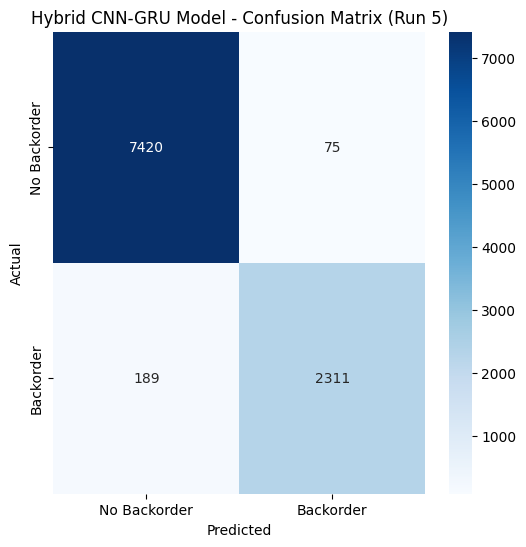

In [ ]:
for run in range(n_repeats):
    print(f"\n{'='*50}")
    print(f"Run {run+1}/{n_repeats}")
    print(f"{'='*50}")

    # Build Hybrid CNN-GRU Model with consistent settings
    input_layer = Input(shape=(SEQ_LENGTH, FEATURES))

    # CNN Branch (adjusted for SEQ_LENGTH=5)
    cnn_branch = Conv1D(64, kernel_size=3, activation='relu', padding='same')(input_layer)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = Dropout(0.3)(cnn_branch)

    cnn_branch = Conv1D(128, kernel_size=3, activation='relu', padding='same')(cnn_branch)
    cnn_branch = BatchNormalization()(cnn_branch)
    cnn_branch = GlobalAveragePooling1D()(cnn_branch)
    cnn_branch = Dropout(0.3)(cnn_branch)

    # GRU Branch (same as GRU model)
    gru_branch = GRU(128, return_sequences=True)(input_layer)
    gru_branch = BatchNormalization()(gru_branch)
    gru_branch = Dropout(0.3)(gru_branch)

    gru_branch = GRU(128, return_sequences=False)(gru_branch)
    gru_branch = BatchNormalization()(gru_branch)
    gru_branch = Dropout(0.3)(gru_branch)

    # Combine branches
    combined = concatenate([cnn_branch, gru_branch])

    # Final Dense layers (same as LSTM)
    dense_layer = Dense(64, activation='relu')(combined)
    dense_layer = BatchNormalization()(dense_layer)
    dense_layer = Dropout(0.3)(dense_layer)

    output_layer = Dense(1, activation='sigmoid')(dense_layer)

    model = Model(inputs=input_layer, outputs=output_layer)

    # Same optimizer settings as LSTM
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(name='precision'),
                           tf.keras.metrics.Recall(name='recall'),
                           tf.keras.metrics.AUC(name='auc')])

    # Same training parameters as LSTM
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=64,
        callbacks=callbacks,
        class_weight={0: 1, 1: 2},  # Same class weights
        verbose=1
    )

    # Same evaluation metrics as LSTM
    results = model.evaluate(X_test, y_test, verbose=0)
    metrics['loss'].append(results[0])
    metrics['accuracy'].append(results[1])
    metrics['precision'].append(results[2])
    metrics['recall'].append(results[3])
    metrics['auc'].append(results[4])

    print(f"\nRun {run+1} Results:")
    print(f"Test Loss: {results[0]:.4f}")
    print(f"Test Accuracy: {results[1]:.4f}")
    print(f"Test Precision: {results[2]:.4f}")
    print(f"Test Recall: {results[3]:.4f}")
    print(f"Test AUC: {results[4]:.4f}")

    # Additional evaluation (classification report and confusion matrix)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Backorder', 'Backorder'],
                yticklabels=['No Backorder', 'Backorder'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Hybrid CNN-GRU Model - Confusion Matrix (Run {run+1})')
    plt.show()

In [ ]:
# Final summary
print("\n\nFinal Summary:")
print("="*50)
for metric_name, values in metrics.items():
    mean = np.mean(values)
    std = np.std(values)
    print(f"{metric_name}: {mean:.4f} ± {std:.4f}")



Final Summary:
accuracy: 0.9729 ± 0.0008
precision: 0.9639 ± 0.0073
recall: 0.9264 ± 0.0087
auc: 0.9899 ± 0.0011
loss: 0.0870 ± 0.0027


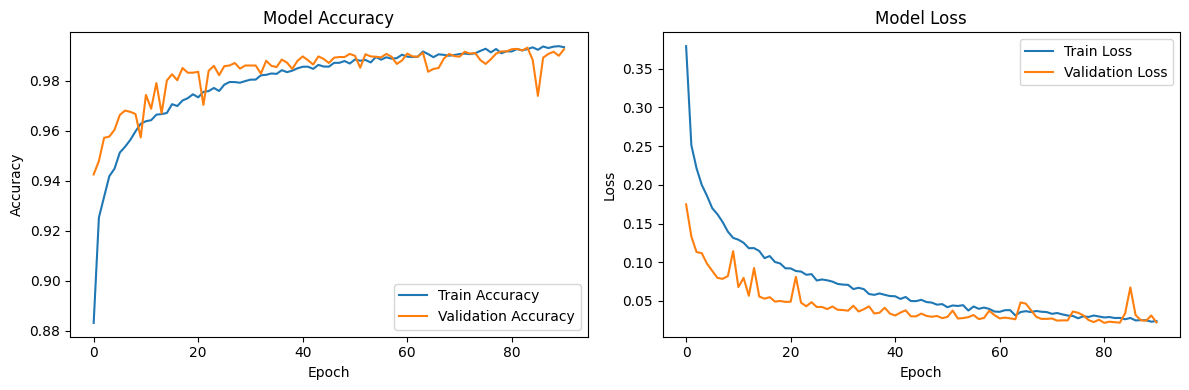

In [ ]:
# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
# Save final model
model.save('/content/drive/MyDrive/Thesis/backorder_cnn_gru_model_dataset_3.h5')
print("Hybrid CNN-GRU model saved successfully!")

Hybrid CNN-GRU model saved successfully!
